<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Build-a-scorecard" data-toc-modified-id="Build-a-scorecard-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Build a scorecard</a></span></li><li><span><a href="#Import-libraries-and-load-data" data-toc-modified-id="Import-libraries-and-load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import libraries and load data</a></span><ul class="toc-item"><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Load-data-and-check-the-response-rate" data-toc-modified-id="Load-data-and-check-the-response-rate-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Load data and check the response rate</a></span></li><li><span><a href="#Feature-filtering/selection" data-toc-modified-id="Feature-filtering/selection-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Feature filtering/selection</a></span></li><li><span><a href="#Feature-binning" data-toc-modified-id="Feature-binning-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Feature binning</a></span></li><li><span><a href="#Steps-for-feature-binning:" data-toc-modified-id="Steps-for-feature-binning:-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Steps for feature binning:</a></span><ul class="toc-item"><li><span><a href="#Step-1.-Initialization:-c-=-toad.transform.Combiner()" data-toc-modified-id="Step-1.-Initialization:-c-=-toad.transform.Combiner()-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Step 1. Initialization: c = toad.transform.Combiner()</a></span></li><li><span><a href="#Step-2.-Training-binning:" data-toc-modified-id="Step-2.-Training-binning:-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Step 2. Training binning:</a></span></li><li><span><a href="#Step-3.-check-binning-nodes:-c.export()" data-toc-modified-id="Step-3.-check-binning-nodes:-c.export()-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Step 3. check binning nodes: c.export()</a></span></li><li><span><a href="#Step-4.-Manually-adjust-binning:-c.load(dict)" data-toc-modified-id="Step-4.-Manually-adjust-binning:-c.load(dict)-2.5.4"><span class="toc-item-num">2.5.4&nbsp;&nbsp;</span>Step 4. Manually adjust binning: c.load(dict)</a></span></li><li><span><a href="#Step-5.-Apply-binning-results:-c.transform(dataframe,-labels=False)" data-toc-modified-id="Step-5.-Apply-binning-results:-c.transform(dataframe,-labels=False)-2.5.5"><span class="toc-item-num">2.5.5&nbsp;&nbsp;</span>Step 5. Apply binning results: c.transform(dataframe, labels=False)</a></span></li></ul></li><li><span><a href="#Calculate-PSI" data-toc-modified-id="Calculate-PSI-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Calculate PSI</a></span></li><li><span><a href="#Output-Information-Value" data-toc-modified-id="Output-Information-Value-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Output Information Value</a></span></li><li><span><a href="#Modeling-Tuning" data-toc-modified-id="Modeling-Tuning-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Modeling Tuning</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Train-a-Gradient-Boosting-Decision-Tree-(GBDT)-and-check-the-feature-importance-table" data-toc-modified-id="Train-a-Gradient-Boosting-Decision-Tree-(GBDT)-and-check-the-feature-importance-table-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Train a Gradient Boosting Decision Tree (GBDT) and check the feature importance table</a></span></li><li><span><a href="#Model-production" data-toc-modified-id="Model-production-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Model production</a></span></li><li><span><a href="#Scorecard-generation" data-toc-modified-id="Scorecard-generation-2.12"><span class="toc-item-num">2.12&nbsp;&nbsp;</span>Scorecard generation</a></span></li><li><span><a href="#Distribution-analysis" data-toc-modified-id="Distribution-analysis-2.13"><span class="toc-item-num">2.13&nbsp;&nbsp;</span>Distribution analysis</a></span></li><li><span><a href="#Threshold-tuning" data-toc-modified-id="Threshold-tuning-2.14"><span class="toc-item-num">2.14&nbsp;&nbsp;</span>Threshold tuning</a></span><ul class="toc-item"><li><span><a href="#Threshold-tuning-&amp;-Trade-off-between-loss-&amp;-coverage" data-toc-modified-id="Threshold-tuning-&amp;-Trade-off-between-loss-&amp;-coverage-2.14.1"><span class="toc-item-num">2.14.1&nbsp;&nbsp;</span>Threshold tuning &amp; Trade-off between loss &amp; coverage</a></span></li></ul></li><li><span><a href="#Categorical-features" data-toc-modified-id="Categorical-features-2.15"><span class="toc-item-num">2.15&nbsp;&nbsp;</span>Categorical features</a></span></li></ul></li></ul></div>

## Build a scorecard

- Build a scorecard using machine learning with Python
- Skillset: Logistic Regression, Gradient Boosting, Weight of Evidence (WOE), Information Value (IV), Binning, Chi-square Binning

Building a credit scorecard is a very typical industry-level problem, such as

evaluating a transaction or customer’s credibility to perform further actions such as issuing a credit card or giving a balance transfer offer for high-credit customers in a credit card company,
giving promotions or premium rights to high-value customers in an e-commerce platform,
providing good customer segmentation to reach the right people in a marketing firm.
You need to build a system to score customers, and it has to be explainable to non-tech people, because when something goes wrong (False Alarm), you will know how to explain it to the manager/customer/business side.

Open Source Tool: **Toad** is a production-to-go library for building scorecards; it offers EDA, feature engineering, and scorecard generation. Its key functionality streamlines the most critical and time-consuming processes such as feature selection and fine binning.

 ## Import libraries and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn
from sklearn.metrics import roc_auc_score,roc_curve,auc,precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier

import glob
import math
import pickle
import toad
import random

from datetime import datetime, date, timedelta
from library.sb_utils import save_file
%matplotlib inline

sns.set()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
import pkg_resources
import pip
installedPackages = {pkg.key for pkg in pkg_resources.working_set}
required = { 'pandas','numpy', 'matplotlib', 'seaborn','toad','pickle','sklearn'}
missing = required - installedPackages
if missing:
    !pip install pandas
    !pip install numpy
    !pip install matplotlib
    !pip install seaborn
    !pip install toad
    !pip install pickle
    !pip install sklearn

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


### Data preprocessing

In [3]:
def data_split(df, start, end, date_col):
    """
    split the dataset into training or testing using date
    :param data: (df) pandas dataframe, start, end
    :return: (df) pandas dataframe
    """
    data = df[(df[date_col] >= start) & (df[date_col] < end)]
    #data = df[(df.order_date >= start) & (df.order_date < end)]
    data = data.reset_index(drop=True)
    #data = data.sort_values(["date", "tic"], ignore_index=True)
    #data.index = data.date.factorize()[0]
    return data


def target_info(df_target_column):
    '''
    Print target column information -- count for each unique values in target column
    Input: target column in dataframe
    '''
    proportion_true=str(round(sum(df_target_column == True) / len(df_target_column), 2) * 100)
    
    proportion_false=str(round(sum(df_target_column == False) / len(df_target_column), 3) * 100)
    
    print('There are total {} records in our data.'.format(len(df_target_column)))
    print('Is Respond:')
    print('Count: {}'.format(sum(df_target_column == True)))
    print('Proportion (Respond): {}'.format(proportion_true
                                  + '%'))
    print('Not Respond:')
    print('Count: {}'.format(sum(df_target_column == False)))
    print('Proportion (Not Resond): {}'.format(proportion_false
                                  + '%'))
    plt.figure(figsize=(5, 5))
    sns.barplot(x=df_target_column.value_counts().index, y=df_target_column.value_counts())
    plt.title('Not vs Responde Counts')
    plt.ylabel('Count')
    return proportion_true

### Load data and check the response rate

There are total 2152 records in our data.
Is Respond:
Count: 328
Proportion (Respond): 15.0%
Not Respond:
Count: 1824
Proportion (Not Resond): 84.8%


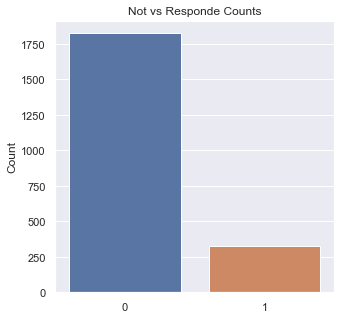

In [4]:
# load csv file
data= pd.read_csv('./Data/01_cleaned_data.csv')
# check the size of the data
data.shape
# use the word 'label'
data['label'] = data['AcceptedCmp6']
data = data.drop(columns='AcceptedCmp6')
# check the responses proportion of the label
target_info(data['label'])
# set an exclude list for the scorecard package 'Toad'
exclude_list = ['ID', 'label']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152 entries, 0 to 2151
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2152 non-null   int64  
 1   Education            2152 non-null   object 
 2   Marital_Status       2152 non-null   object 
 3   Income               2152 non-null   float64
 4   Dt_Customer          2152 non-null   object 
 5   Recency              2152 non-null   int64  
 6   Wines                2152 non-null   int64  
 7   Fruits               2152 non-null   int64  
 8   Meat                 2152 non-null   int64  
 9   Fish                 2152 non-null   int64  
 10  Sweets               2152 non-null   int64  
 11  Gold                 2152 non-null   int64  
 12  NumDealsPurchases    2152 non-null   int64  
 13  NumWebPurchases      2152 non-null   int64  
 14  NumCatalogPurchases  2152 non-null   int64  
 15  NumStorePurchases    2152 non-null   i

In [6]:
data.describe()

,ID,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Children,Days_Enrolled,label
count,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000
mean,5566.660316,52608.718401,49.036710,313.405669,26.919610,168.314126,38.550186,27.535316,44.409851,2.302045,4.128717,2.687732,5.913104,5.261617,0.073420,0.076208,0.074814,0.065985,0.013941,0.009294,46.258829,0.952138,536.185874,0.152416
std,3241.840627,19844.884223,28.921881,338.400831,40.116109,216.520403,55.255034,41.174332,51.300994,1.815486,2.626205,2.755676,3.224496,2.278975,0.260885,0.265393,0.263152,0.248314,0.117271,0.095977,11.655460,0.751280,231.694425,0.359508
min,0.000000,15033.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,26.000000,0.000000
25%,2803.500000,36144.500000,24.000000,27.000000,2.000000,17.000000,3.000000,1.000000,9.000000,1.000000,2.000000,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000,365.000000,0.000000
50%,5429.500000,52173.500000,49.000000,188.500000,8.500000,71.000000,13.000000,9.000000,26.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,1.000000,537.500000,0.000000
75%,8395.500000,68685.250000,74.000000,514.250000,34.000000,239.000000,52.000000,35.000000,57.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,1.000000,711.000000,0.000000
max,11191.000000,105471.000000,99.000000,1493.000000,199.000000,984.000000,259.000000,198.000000,249.000000,15.000000,11.000000,11.000000,13.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,3.000000,1089.000000,1.000000


In [7]:
# use the ID column to split the train-test data
train = data_split(data,start = 0, end=8395,date_col='ID')
test = data_split(data,start = 8395, end=172792,date_col='ID')

In [8]:
train.label.value_counts()

0    1362
1     251
Name: label, dtype: int64

In [9]:
test.label.value_counts()

0    462
1     77
Name: label, dtype: int64

### Feature filtering/selection

In [10]:
###feature filtering by missing value, IV & corrrelation：
##If the missing value rate is greater than the threshold, delete the feature
##If the correlation coefficient is greater than the threshold, delete the feature
##If the IV is smaller than the threshold, delete the features

train_selected, drop_lst= toad.selection.select(frame = train,
                                                target=train['label'], 
                                                empty = 0.7, 
                                                iv = 0.02, corr = 1, 
                                                return_drop=True, 
                                                exclude=exclude_list)
print("keep:",train_selected.shape[1],
      "drop empty:",len(drop_lst['empty']),
      "drop ivalue:",len(drop_lst['iv']),
      "drop corr:",len(drop_lst['corr']))

keep: 26 drop empty: 0 drop ivalue: 2 drop corr: 0


In [11]:
drop_lst

{'empty': array([], dtype=float64),
 'iv': array(['Complain', 'Age_group'], dtype=object),
 'corr': array([], dtype=object)}

In [12]:
# output the iv table to a dataframe
def output_iv_importance(train_selected,label_col):
    feat_import_iv = toad.quality(train_selected,label_col,iv_only=True)
    feat_import_iv=feat_import_iv['iv']
    feat_import_iv = feat_import_iv.reset_index()
    feat_import_iv.columns = ['name','iv']
    return feat_import_iv
df_iv=output_iv_importance(train_selected,'label')

In [13]:
df_iv.shape

(25, 2)

In [14]:
df_iv.head(30)

,name,iv
0,Dt_Customer,2.376006
1,Wines,0.665690
2,AcceptedCmp5,0.604251
3,Meat,0.563389
4,Income,0.556725
5,NumCatalogPurchases,0.547938
6,Days_Enrolled,0.486465
7,Recency,0.472861
8,Gold,0.452248
9,AcceptedCmp1,0.445595


### Feature binning

Feature binning is to transform a continuous numerical variable into a categorical feature.

- It simplifies the logistic regression model and reduces the risk of model overfitting

- Logistic regression is a generalized linear model, and its expressive ability is limited; Feature binning can introduce nonlinearity into the model, which can improve the expressive ability of the model and help better model fitting

- The discretized features are very robust to abnormal data: for example, a feature is 1 if age > 30, and 0 otherwise. If the features are not discretized, an abnormal data point "300 years old" will impact the model fitting

- It can treat null data as an individual class

In [15]:
train_selected.label.value_counts()

0    1362
1     251
Name: label, dtype: int64

In [16]:
train_selected.shape

(1613, 26)

### Steps for feature binning:

#### Step 1. Initialization: c = toad.transform.Combiner()
#### Step 2. Training binning:
c.fit(dataframe, y = 'target', method = 'chi', min_samples = 0.05, n_bins = None, empty_separate = False)

- y: target column
- binning method: supports chi (chi-square binning), dt (decision tree binning), kmean, quantile, step (equal step size binning)
- min_samples: Each box contains the least number of samples, which can be a number or a proportion
- n_bins: the number of bins; If it is not possible to divide so many boxes the maximum number of bins will be divided.
- empty_separate: Whether to separate empty boxes separately

#### Step 3. check binning nodes: c.export()
#### Step 4. Manually adjust binning: c.load(dict)
#### Step 5. Apply binning results: c.transform(dataframe, labels=False)
- labels: Whether to convert the binning results into box labels. If False, output 0, 1, 2… (discrete variables are sorted according to the proportion), and if True output (-inf, 0], (0,10], (10, inf).

In [17]:
# train_selected = train_selected.drop(columns=['Dt_Customer', 'NumDealsPurchases', 'NumWebVisitsMonth'])
train_selected = train_selected.drop(columns='Dt_Customer')

In [18]:
import time
start = time.time()
combiner = toad.transform.Combiner()
# use the filtered features for training
# Use the stable chi-square binning, 
# specifying that each bin has at least 5% data to ensure stability
# empty values will be automatically assigned to the best bin
combiner.fit(X=train_selected,
             y=train_selected['label'],
             method='chi',
             min_samples = 0.05,
             exclude=exclude_list)
end = time.time()
print((end-start)/60)

0.015123180548350016


In [19]:
combiner

In [20]:
# save 1: pickle combiner
filename = 'Score_save1_combiner.pkl'
pickle.dump(combiner, open(filename, 'wb'))

In [21]:
filename

'Score_save1_combiner.pkl'

In [22]:
# load the model from the disk
combiner = pickle.load(open(filename, 'rb'))

In [23]:
# output binning
bins= combiner.export()

In [24]:
len(bins)

23

In [25]:
bins

{'Education': [['Undergrad'], ['Postgrad']],
 'Marital_Status': [['couple'], ['single']],
 'Income': [53367.0, 75154.0],
 'Recency': [24, 37, 53, 63, 83],
 'Wines': [380, 667],
 'Fruits': [7, 22, 43],
 'Meat': [24, 108, 499],
 'Fish': [3, 7, 13, 39, 93],
 'Sweets': [2, 4, 10, 15, 30, 49, 76],
 'Gold': [15, 125],
 'NumDealsPurchases': [],
 'NumWebPurchases': [2, 3, 5, 6, 7, 8, 9],
 'NumCatalogPurchases': [1, 5],
 'NumStorePurchases': [3, 4, 5, 6, 7, 9, 10, 12],
 'NumWebVisitsMonth': [],
 'AcceptedCmp3': [1],
 'AcceptedCmp4': [1],
 'AcceptedCmp5': [1],
 'AcceptedCmp1': [1],
 'AcceptedCmp2': [],
 'Age': [34, 38, 46, 64],
 'Children': [1],
 'Days_Enrolled': [455, 726]}

In [26]:
# apply binning
train_selected_bin = combiner.transform(train_selected)
test_bin = combiner.transform(test[train_selected_bin.columns])

In [27]:
train_selected_bin.head()

,ID,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Children,Days_Enrolled,label
0,5524,0,1,1,3,1,3,3,5,7,1,0,6,2,2,0,0,0,0,0,0,3,0,2,1
1,2174,0,1,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,1,0,0
2,4141,0,0,1,1,1,3,2,5,4,1,0,6,1,7,0,0,0,0,0,0,3,0,1,0
3,6182,0,0,0,1,0,0,0,2,1,0,0,1,0,2,0,0,0,0,0,0,0,1,0,0
4,5324,1,0,1,5,0,3,2,4,4,1,0,3,1,4,0,0,0,0,0,0,1,1,0,0


In [28]:
train_selected_bin.describe()

,ID,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Children,Days_Enrolled,label
count,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.0,1613.000000,1613.000000,1613.000000,1613.0,1613.000000,1613.000000,1613.000000,1613.000000,1613.0,1613.000000,1613.000000,1613.000000,1613.000000
mean,4133.982021,0.396776,0.355239,0.636082,2.443273,0.515189,1.101674,1.199008,2.338500,2.886547,0.743335,0.0,2.575325,0.993800,3.441414,0.0,0.076875,0.081215,0.078115,0.068196,0.0,2.174830,0.714197,0.833850,0.155611
std,2368.072428,0.489381,0.478734,0.742782,1.828581,0.767225,1.185972,0.993502,1.756445,2.410461,0.619043,0.0,2.077305,0.688409,2.516165,0.0,0.266476,0.273250,0.268436,0.252160,0.0,1.177408,0.451936,0.760971,0.362598
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2134.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,0.000000,0.000000,0.000000
50%,4168.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.0,2.000000,1.000000,3.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,1.000000,1.000000,0.000000
75%,6183.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000,2.000000,4.000000,5.000000,1.000000,0.0,4.000000,1.000000,5.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,1.000000,1.000000,0.000000
max,8387.000000,1.000000,1.000000,2.000000,5.000000,2.000000,3.000000,3.000000,5.000000,7.000000,2.000000,0.0,7.000000,2.000000,8.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,4.000000,1.000000,2.000000,1.000000


In [29]:
test_bin.describe()

,ID,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Children,Days_Enrolled,label
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.0,539.000000,539.000000,539.000000,539.0,539.000000,539.000000,539.000000,539.000000,539.0,539.000000,539.000000,539.000000,539.000000
mean,9854.063080,0.348794,0.346939,0.664193,2.200371,0.484230,1.096475,1.207792,2.306122,2.833024,0.740260,0.0,2.539889,0.962894,3.480519,0.0,0.063080,0.061224,0.064935,0.059369,0.0,2.170686,0.721707,0.875696,0.142857
std,803.901904,0.477031,0.476438,0.731931,1.807851,0.745016,1.201752,1.008078,1.820214,2.499432,0.636026,0.0,2.046800,0.717878,2.582665,0.0,0.243332,0.239964,0.246640,0.236534,0.0,1.191900,0.448575,0.774443,0.350252
min,8395.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,9207.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000
50%,9938.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,3.000000,2.000000,1.000000,0.0,2.000000,1.000000,3.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,1.000000,1.000000,0.000000
75%,10554.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000,2.000000,4.000000,5.000000,1.000000,0.0,4.000000,1.000000,5.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,1.000000,1.000000,0.000000
max,11191.000000,1.000000,1.000000,2.000000,5.000000,2.000000,3.000000,3.000000,5.000000,7.000000,2.000000,0.0,7.000000,2.000000,8.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,4.000000,1.000000,2.000000,1.000000


In [30]:
features_list = [feat for feat in train_selected_bin.columns if feat not in exclude_list]
len(features_list)

23

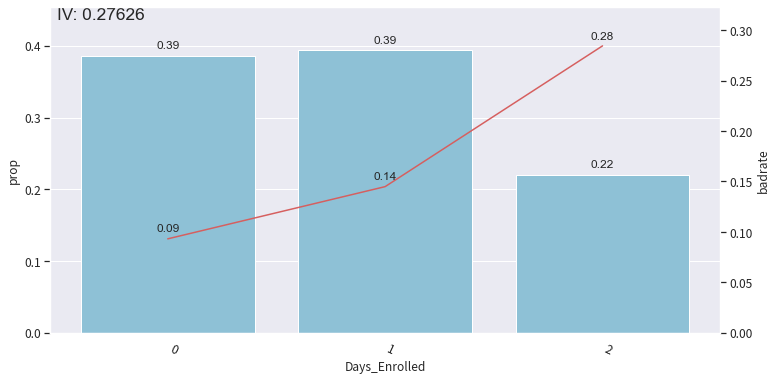

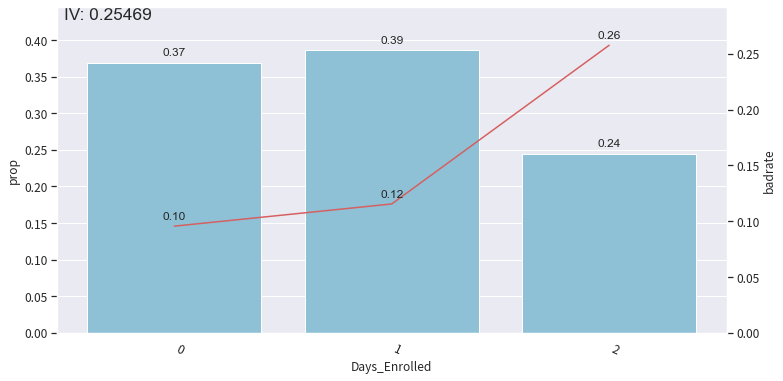

In [31]:
# Fine tune bins
from toad.plot import bin_plot, badrate_plot

bin_plot(train_selected_bin,x='Days_Enrolled',target='label')
bin_plot(test_bin,x='Days_Enrolled',target='label')
plt.show();

In [32]:
# setting rules
#rule = {'Days_Enrolled':[['0', 'nan'],['1'], ['2'], ['3']]}

# Adjust binning
#c.set_rules(rule)

In [33]:
train_selected_bin.Days_Enrolled.describe()

count    1613.000000
mean        0.833850
std         0.760971
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Days_Enrolled, dtype: float64

In [34]:
##转化成WOE映射
t=toad.transform.WOETransformer()
#transform training set
train_woe = t.fit_transform(X=train_selected_bin,
                            y=train_selected_bin['label'], 
                            exclude=exclude_list)
#transform testing set
test_woe = t.transform(test_bin)

In [35]:
train_woe.head()

,ID,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Children,Days_Enrolled,label
0,5524,-0.260539,0.494831,-0.304892,0.131299,-0.341665,0.541148,1.199662,0.592644,0.402601,0.263675,0.0,0.110806,0.765663,-0.124033,0.0,-0.22505,-0.166603,-0.310376,-0.241789,0.0,-0.160000,0.702459,0.769043,1
1,2174,-0.260539,0.494831,-0.339841,-0.515185,-0.399969,-0.535681,-0.928712,-0.317567,-0.458803,-0.945919,0.0,-0.935825,-0.046582,0.531490,0.0,-0.22505,-0.166603,-0.310376,-0.241789,0.0,-0.160000,-0.405885,-0.585126,0
2,4141,-0.260539,-0.364604,-0.304892,0.152555,-0.341665,0.541148,0.172141,0.592644,0.425590,0.263675,0.0,0.110806,-0.046582,-0.108050,0.0,-0.22505,-0.166603,-0.310376,-0.241789,0.0,-0.160000,0.702459,-0.084064,0
3,6182,-0.260539,-0.364604,-0.339841,0.152555,-0.399969,-0.535681,-0.928712,-0.649480,0.059840,-0.945919,0.0,-0.638944,-1.389033,-0.124033,0.0,-0.22505,-0.166603,-0.310376,-0.241789,0.0,0.501672,-0.405885,-0.585126,0
4,5324,0.324380,-0.364604,-0.304892,-1.062779,-0.399969,0.541148,0.172141,0.262403,0.425590,0.263675,0.0,0.718796,-0.046582,0.433580,0.0,-0.22505,-0.166603,-0.310376,-0.241789,0.0,-0.641634,-0.405885,-0.585126,0


In [36]:
final_data_woe = pd.concat([train_woe, test_woe])

In [37]:
#save 2: pickle woe_transform
filename = 'Score_save2_woe_transform.pkl'
pickle.dump(t, open(filename, 'wb'))

In [38]:
features_use = [feat for feat in final_data_woe.columns if feat not in exclude_list]

In [39]:
len(features_use)

23

### Calculate PSI

- PSI (Population Stability Index) reflects the stability of the distribution. We often use it to screen features and evaluate model stability. The industry level is to drop features with a PSI greater than 0.2

In [40]:
#get the feature name
features_list = [feat for feat in train_woe.columns if feat not in exclude_list]
#calculate PSI using toad
psi_df = toad.metrics.PSI(train_woe[features_list], test_woe[features_list]).sort_values()
#put into a dataframe
psi_df = psi_df.reset_index()
psi_df = psi_df.rename(columns = {'index': 'feature', 0:'psi'})

In [41]:
psi_df

,feature,psi
0,AcceptedCmp2,0.000000
1,NumDealsPurchases,0.000000
2,NumWebVisitsMonth,0.000000
3,Children,0.000279
4,Marital_Status,0.000302
5,AcceptedCmp1,0.001307
6,Fruits,0.001816
7,Wines,0.002175
8,Gold,0.002305
9,AcceptedCmp5,0.002623


In [42]:
# features less than 0.25
psi025 = list(psi_df[psi_df.psi<0.25].feature)
# features geater than 0.25
psi_remove = list(psi_df[psi_df.psi>=0.25].feature)

In [43]:
psi025

['AcceptedCmp2',
 'NumDealsPurchases',
 'NumWebVisitsMonth',
 'Children',
 'Marital_Status',
 'AcceptedCmp1',
 'Fruits',
 'Wines',
 'Gold',
 'AcceptedCmp5',
 'AcceptedCmp3',
 'Days_Enrolled',
 'AcceptedCmp4',
 'Income',
 'NumCatalogPurchases',
 'Age',
 'Education',
 'Meat',
 'NumStorePurchases',
 'Fish',
 'Sweets',
 'NumWebPurchases',
 'Recency']

In [44]:
psi_remove

[]

In [45]:
# keep exclude list
for i in exclude_list:
    if i in psi025:
        pass
    else:
        psi025.append(i) 

In [46]:
# remove features that are geater than 0.25
train_selected_woe_psi = train_woe[psi025]
off_woe_psi = test_woe[psi025]

In [47]:
# output final data table
final_data_woe = pd.concat([train_selected_woe_psi,off_woe_psi])

In [48]:
print(final_data_woe.shape)

(2152, 25)


In [49]:
#save 3: final data table with transformed woe
final_data_woe.to_csv('Score_save3_final_data_woe.csv')

### Output Information Value

In [50]:
features_use = [feat for feat in final_data_woe.columns if feat not in exclude_list]
len(features_use)

23

In [51]:
# 
df_iv = output_iv_importance(final_data_woe[features_use+['label']],'label')

In [52]:
df_iv

,name,iv
0,AcceptedCmp5,0.541226
1,NumCatalogPurchases,0.510474
2,Meat,0.482408
3,AcceptedCmp1,0.450280
4,Wines,0.390519
5,Recency,0.374822
6,Gold,0.356044
7,AcceptedCmp3,0.346867
8,NumWebPurchases,0.341134
9,Income,0.339623


In [53]:
##save 4: information value after woe transformation
df_iv.to_csv('Score_save4_IV.csv')

### Modeling Tuning

In [54]:
from sklearn.linear_model import LogisticRegression
from toad.metrics import KS, AUC
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, plot_roc_curve, classification_report

def check_train_test_auc(x_train,y_train,x_test,y_test):
    # 用逻辑回归建模
    lr = LogisticRegression(random_state=42,C= 0.1, penalty='l2', solver='newton-cg')

    lr = LogisticRegression(class_weight='balanced')
    lr.fit(x_train, y_train)

    # 预测训练和隔月的OOT
    pred_train = lr.predict_proba(x_train)[:,1]
    
    print('train KS',KS(pred_train, y_train))
    print('train AUC',AUC(pred_train, y_train))
    
    pred_OOT =lr.predict_proba(x_test)[:,1]
    print('Test KS',KS(pred_OOT, y_test))
    print('Test AUC',AUC(pred_OOT, y_test))    
    
    fig, ax = plt.subplots(figsize=(12, 8))
    plot_roc_curve(lr, x_test, y_test, color='blue', ax=ax)

### Logistic Regression

train KS 0.6419783421380557
train AUC 0.8969759727609387
Test KS 0.5930735930735931
Test AUC 0.8624135604655084


C:\Users\ligeo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


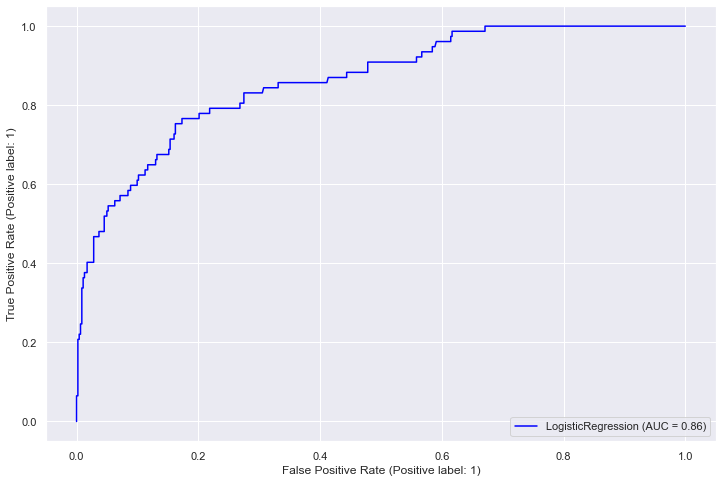

In [55]:
#train & test
check_train_test_auc(x_train = train_woe[features_use],y_train=train_woe['label'],
                     x_test =test_woe[features_use] ,y_test = test_woe['label'])

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

def get_evaluation_scores(label, predictions):    
    tp, fn, fp, tn = confusion_matrix(label,predictions,labels=[1,0]).reshape(-1)
    print('True Positive：',tp)
    print('True Negative：',tn)
    print('False Positive：',fp)
    print('False Negative：',fn)
    accuracy = (tp+tn)/(tp+fn+fp+tn)
    print('accuracy: ',accuracy)
    recall = tp/(tp+fn)
    print('（recall）: ',recall)
    precision = tp/(tp+fp)
    print('（precision）: ',precision)
    #f1 score = 2*(P*R)/(P+R)
    f1 = 2*precision*recall/(precision+recall)
    print('F1 score: ',f1)
    
    print(classification_report(label, predictions))
    
    print('balanced_accuracy_score: ',balanced_accuracy_score(label,predictions))
    return precision, recall

def evaluate_result(df_train,df_test,features_name):    
    start = time.time()
    x_train = df_train[features_name]
    y_train = df_train['label']

    x_test  = df_test[features_name]
    y_test  = df_test['label']

    model = GradientBoostingClassifier(n_estimators=250,random_state=0)
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    get_evaluation_scores(label = y_test, predictions=predictions)
    feat_importances = pd.Series(model.feature_importances_, index=features_name)
    feat_importances=pd.DataFrame(feat_importances).reset_index()
    feat_importances.columns=['feature_name','feature_importance']
    feat_importances=feat_importances.sort_values(['feature_importance'],ascending=False)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(15,15))

    sns_plot1=sns.barplot(feat_importances.feature_importance,feat_importances.feature_name,estimator=sum)
    plt.title("Features Importance",size=18)
    plt.ylabel('', size = 15)
    plt.tick_params(labelsize=18)
    return feat_importances,model,x_train,y_train,x_test,y_test


### Train a Gradient Boosting Decision Tree (GBDT) and check the feature importance table

True Positive： 36
True Negative： 449
False Positive： 13
False Negative： 41
accuracy:  0.8998144712430427
（recall）:  0.4675324675324675
（precision）:  0.7346938775510204
F1 score:  0.5714285714285714
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       462
           1       0.73      0.47      0.57        77

    accuracy                           0.90       539
   macro avg       0.83      0.72      0.76       539
weighted avg       0.89      0.90      0.89       539

balanced_accuracy_score:  0.7196969696969697


C:\Users\ligeo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


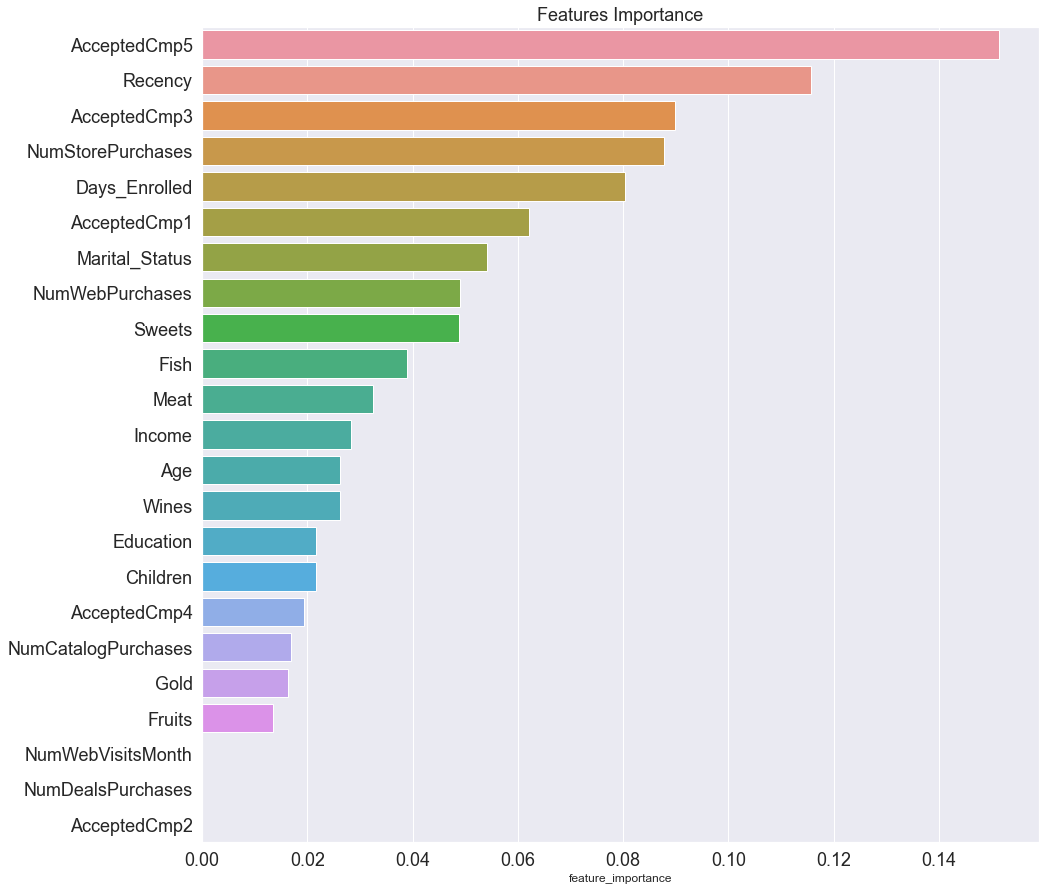

In [57]:
feature_importance_GBDT_reason,model,x_train,y_train,x_test,y_test = evaluate_result(df_train=train_woe,
                df_test=test_woe,
                features_name=features_use)

In [58]:
feature_importance_GBDT_reason

,feature_name,feature_importance
9,AcceptedCmp5,0.151445
22,Recency,0.115680
10,AcceptedCmp3,0.089755
18,NumStorePurchases,0.087723
11,Days_Enrolled,0.080274
5,AcceptedCmp1,0.062032
4,Marital_Status,0.054206
21,NumWebPurchases,0.048941
20,Sweets,0.048869
19,Fish,0.038928


In [59]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

def plot_roc_pre_recall_curve(labels, probs):    
    # Get ROC curve FPR and TPR from true labels vs score values
    fpr, tpr, _ = roc_curve(labels, probs)

    # Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
    roc_auc = auc(fpr, tpr)

    # Calculate precision and recall from true labels vs score values
    precision, recall, _ = precision_recall_curve(labels, probs)

    plt.figure(figsize=(8, 3))

    plt.subplot(1,2,1)
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)

    plt.subplot(1,2,2)
    plt.step(recall, precision, color='orange', where='post')
    # plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision Recall Curve')
    plt.grid(True)

    left  = 0.125  # the left side of the subplots of the figure
    right = 0.9    # the right side of the subplots of the figure
    bottom = 0.1   # the bottom of the subplots of the figure 
    top = 0.9      # the top of the subplots of the figure
    wspace = 0.5   # the amount of width reserved for blank space between subplots
    hspace = 0.2   # the amount of height reserved for white space between subplots
    plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
    plt.show();

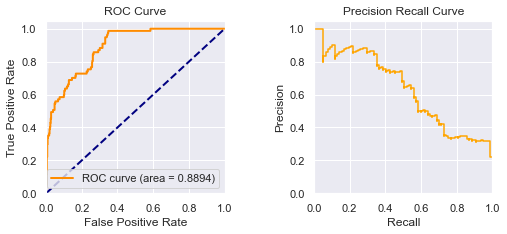

In [60]:
probs = model.predict_proba(x_test)[:,1]
sns.set(font_scale = 1)
plot_roc_pre_recall_curve(y_test, probs)

### Model production

In [61]:
# prepare train & test data
x_train = train_woe[features_use]
y_train=train_woe['label']
x_test =test_woe[features_use] 
y_test = test_woe['label']

In [62]:
#Train LR
#lr = LogisticRegression(random_state=42,C= 0.1, penalty='l2', solver='newton-cg')
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

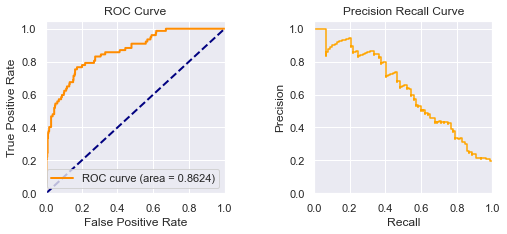

In [63]:
# check AUC
probs = lr.predict_proba(x_test)[:,1]
sns.set(font_scale = 1)
plot_roc_pre_recall_curve(y_test, probs)

### Scorecard generation

In [64]:
# scorecard tuning
card = toad.ScoreCard(
    combiner = combiner,
    transer = t,
    class_weight = 'balanced',
    C=0.1,
    base_score = 1000,
    base_odds = 35 ,
    pdo = 80,
    rate = 2
)

card.fit(train_woe[features_use], train_woe['label'])

ScoreCard(base_score=1000,
          combiner=<toad.transform.Combiner object at 0x0000022360C461C8>,
          pdo=80,
          transer=<toad.transform.WOETransformer object at 0x0000022360C4F788>)

In [65]:
# save 5: save the model to disk
filename = 'Score_save5_ScoreCard.pkl'
pickle.dump(card, open(filename, 'wb'))

In [66]:
# inference on test data
test['Score'] = card.predict(test)
test['Score'].describe()

count     539.000000
mean      686.213955
std       185.896493
min         1.811920
25%       569.037776
50%       703.930377
75%       806.904821
max      1114.427355
Name: Score, dtype: float64

In [67]:
# inference on whole data
data['Score'] = card.predict(data)
data['Score'].describe()

count    2152.000000
mean      686.747504
std       194.044286
min       -80.549781
25%       569.564629
50%       707.526743
75%       819.797140
max      1145.533693
Name: Score, dtype: float64

In [68]:
#output the scorecard
final_card_score=card.export()
len(final_card_score)

20

In [69]:
#transform the scorecard into dataframe and save to csv
keys = list(card.export().keys())
score_card_df = pd.DataFrame()

for n in keys:
    temp = pd.DataFrame.from_dict(final_card_score[n], orient='index')
    temp = temp.reset_index()
    temp.columns= ['binning','score']
    temp['variable'] = n
    temp = temp[['variable','binning','score']]
    score_card_df=score_card_df.append(temp)
score_card_df.head(30)

,variable,binning,score
0,Children,[-inf ~ 1),17.21
1,Children,[1 ~ inf),37.14
0,Marital_Status,couple,77.93
1,Marital_Status,single,-35.43
0,AcceptedCmp1,[-inf ~ 1),43.89
1,AcceptedCmp1,[1 ~ inf),-81.15
0,Fruits,[-inf ~ 7),17.94
1,Fruits,[7 ~ 22),30.89
2,Fruits,[22 ~ 43),37.84
3,Fruits,[43 ~ inf),41.86


In [70]:
#save 6: save the scorcard
score_card_df.to_csv('Score_save6_score_card_df.csv',index=False)

### Distribution analysis

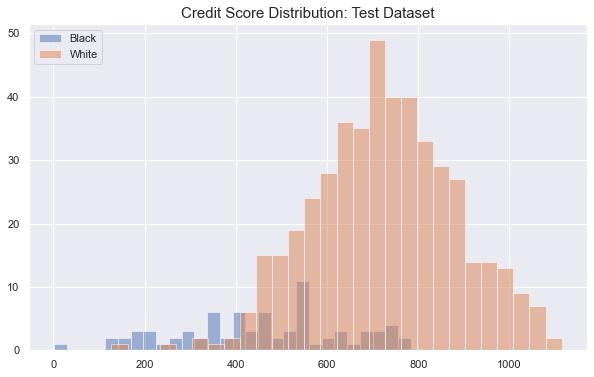

In [71]:
plt.figure(figsize=(10,6))


w = 40
n = math.ceil((test['Score'].max() - test['Score'].min())/w)
#bins = numpy.linspace(-10, 10, 100)

plt.hist(test[test.label==1].Score, alpha=0.5, label='Black',bins = n)
plt.hist(test[test.label==0].Score, alpha=0.5, label='White',bins = n)
plt.legend(loc='upper left')
plt.title('Credit Score Distribution: Test Dataset',size=15)
plt.show()

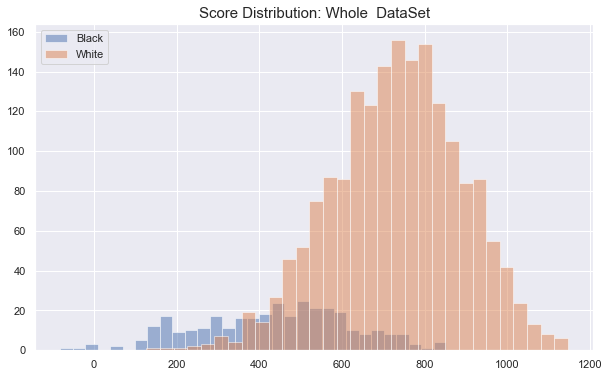

In [72]:
plt.figure(figsize=(10,6))

w = 40
n = math.ceil((data['Score'].max() - data['Score'].min())/w)
#bins = numpy.linspace(-10, 10, 100)

plt.hist(data[data.label==1].Score, alpha=0.5, label='Black',bins = n)
plt.hist(data[data.label==0].Score, alpha=0.5, label='White',bins = n)
plt.legend(loc='upper left')
plt.title('Score Distribution: Whole  DataSet',size=15)
plt.show();

### Threshold tuning

In [73]:
def get_credit_level(
    test,
    target_score ='order_score',
    out_col = 'order_level',
    left_bound = -100,
    level_0 = 100,
    level_1 = 200,    
    level_2 = 250,    
    level_3 = 300,    
    level_4 = 350,    
    level_5 = 400,    
    level_6 = 450,
    level_7 = 500,
    level_8 = 800):
    level = []
    for i in range(len(test)):
        if (test[target_score][i]>left_bound) & (test[target_score][i]<=level_0):
            level.append(0)
        elif  (test[target_score][i]>level_0) & (test[target_score][i]<=level_1):
            level.append(1)
        elif  (test[target_score][i]>level_1) & (test[target_score][i]<=level_2):
            level.append(2)
        elif  (test[target_score][i]>level_2) & (test[target_score][i]<=level_3):
            level.append(3)
        elif  (test[target_score][i]>level_3) & (test[target_score][i]<=level_4):
            level.append(4)
        elif  (test[target_score][i]>level_4) & (test[target_score][i]<=level_5):
            level.append(5)
        elif  (test[target_score][i]>level_5) & (test[target_score][i]<=level_6):
            level.append(6)
        elif  (test[target_score][i]>level_6) & (test[target_score][i]<=level_7):
            level.append(7)
        elif  (test[target_score][i]>level_7 )& (test[target_score][i]<=level_8):
            level.append(8)
        
    test[out_col] = level
    return test

def plot_bts_level_loss(test, target_col):
    bts_level_df = test[target_col].value_counts()
    bts_level_df=pd.DataFrame(bts_level_df)
    df_label_level= test[test.label==1].groupby(target_col)['label'].count()/ test.groupby(target_col)['label'].count()
    df_label_level = pd.DataFrame(df_label_level)
    bts_level_df.sort_index().plot.bar(title='')
    df_label_level.plot()

In [74]:
test.Score.describe()

count     539.000000
mean      686.213955
std       185.896493
min         1.811920
25%       569.037776
50%       703.930377
75%       806.904821
max      1114.427355
Name: Score, dtype: float64

#### Threshold tuning & Trade-off between loss & coverage

In [75]:
test = get_credit_level(test,
                       target_score ='Score',
                       out_col = 'Score_level',
                      left_bound = -1000,
    level_0 = 200,
    level_1 = 300,    
    level_2 = 400,    
    level_3 = 500,    
    level_4 = 580,    
    level_5 = 630,    
    level_6 = 690,
    level_7 = 750,
    level_8 = 1150                   
                )

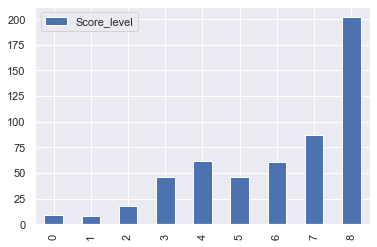

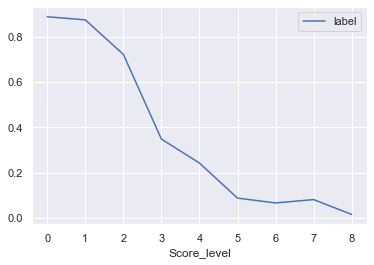

In [76]:
plot_bts_level_loss(test,target_col='Score_level')

In [77]:
sum(test[test.label==1].Score_level==7)

7

### Categorical features

In [78]:
def get_loss_coverage(test,target_level):
    
    #level 8 Loss
    L8_loss=test[test[target_level]>=8 ].label.value_counts()/len(test[test[target_level]>=8 ])
    #level 8 Coverage
    L8_coverage=test[test[target_level]>=8].label.value_counts()[0]/test[test.label==0].shape[0]
    print("Level 8: Loss is ",L8_loss[1], "; Coverage is ",L8_coverage)
    
    #level 7-level 8 Loss
    L7_loss=test[test[target_level]>=7 ].label.value_counts()/len(test[test[target_level]>=7 ])
    #level 7-level 8 Coverage
    L7_coverage=test[test[target_level]>=7].label.value_counts()[0]/test[test.label==0].shape[0]
    print("Level 7-Level 8: Loss is ",L7_loss[1], "; Coverage is ",L7_coverage)
    
    #level 6-level 8 Loss
    L6_loss=test[test[target_level]>=6 ].label.value_counts()/len(test[test[target_level]>=6 ])
    #level 6-level 8 Coverage
    L6_coverage=test[test[target_level]>=6].label.value_counts()[0]/test[test.label==0].shape[0]
    print("Level 6-Level 8: Loss is ",L6_loss[1], "; Coverage is ",L6_coverage)
    
     #level 5-Leve 8 Loss (percentage of default people)
    L5_loss = test[test[target_level]>=5 ].label.value_counts()/len(test[test[target_level]>=5 ])
    #level 5- level 8 Coverage (percentage of good people)
    L5_coverage=test[test[target_level]>=5 ].label.value_counts()[0]/test[test.label==0].shape[0]
    print("Level 5-Level 8: Loss is ",L5_loss[1], "; Coverage is ",L5_coverage)
    
    #level 4-level 8 Loss
    L4_loss=test[test[target_level]>=4 ].label.value_counts()/len(test[test[target_level]>=4 ])
    #level 4-level 8 Coverage
    L4_coverage=test[test[target_level]>=4].label.value_counts()[0]/test[test.label==0].shape[0]
    print("Level 4-Level 8: Loss is ",L4_loss[1], "; Coverage is ",L4_coverage)
    
    
    #level 3-level 8 Loss
    L3_loss=test[test[target_level]>=3].label.value_counts()/len(test[test[target_level]>=3 ])
    #level 3-level 8 Coverage
    L3_coverage=test[test[target_level]>=3].label.value_counts()[0]/test[test.label==0].shape[0]
    print("Level 3-Level 8: Loss is ",L3_loss[1], "; Coverage is ",L3_coverage)
    
    #level 2-level 8 Loss
    L2_loss=test[test[target_level]>=2].label.value_counts()/len(test[test[target_level]>=2 ])
    #level 2-level 8 Coverage
    L2_coverage=test[test[target_level]>=2].label.value_counts()[0]/test[test.label==0].shape[0]
    print("Level 2-Level 8: Loss is ",L2_loss[1], "; Coverage is ",L2_coverage)
    
    #level 1-level 8 Loss
    L1_loss=test[test[target_level]>=1].label.value_counts()/len(test[test[target_level]>=1 ])
    #level 1-level 8 Coverage
    L1_coverage=test[test[target_level]>=1].label.value_counts()[0]/test[test.label==0].shape[0]
    print("Level 1-Level 8: Loss is ",L1_loss[1], "; Coverage is ",L1_coverage)
    
    #level 0-level 8 Loss
    L0_loss=test[test[target_level]>=0].label.value_counts()/len(test[test[target_level]>=0 ])
    #level 0-level 8 Coverage
    L0_coverage=test[test[target_level]>=0].label.value_counts()[0]/test[test.label==0].shape[0]
    print("Level 0-Level 8: Loss is ",L0_loss[1], "; Coverage is ",L0_coverage)

In [79]:
get_loss_coverage(test,target_level='Score_level')

Level 8: Loss is  0.01485148514851485 ; Coverage is  0.43073593073593075
Level 7-Level 8: Loss is  0.03460207612456748 ; Coverage is  0.6038961038961039
Level 6-Level 8: Loss is  0.04 ; Coverage is  0.7272727272727273
Level 5-Level 8: Loss is  0.045454545454545456 ; Coverage is  0.8181818181818182
Level 4-Level 8: Loss is  0.07205240174672489 ; Coverage is  0.9199134199134199
Level 3-Level 8: Loss is  0.09722222222222222 ; Coverage is  0.9848484848484849
Level 2-Level 8: Loss is  0.11877394636015326 ; Coverage is  0.9956709956709957
Level 1-Level 8: Loss is  0.13018867924528302 ; Coverage is  0.9978354978354979
Level 0-Level 8: Loss is  0.14285714285714285 ; Coverage is  1.0


In [80]:
#save 7: save the scorcard
data.to_csv('Score_save7_whole_data.csv',index=False)

In [81]:
test.loc[0,:]

ID                           9736
Education               Undergrad
Marital_Status             couple
Income                    41850.0
Dt_Customer            2012-12-24
Recency                        51
Wines                          53
Fruits                          5
Meat                           19
Fish                            2
Sweets                         13
Gold                            4
NumDealsPurchases               3
NumWebPurchases                 3
NumCatalogPurchases             0
NumStorePurchases               3
NumWebVisitsMonth               8
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    0
AcceptedCmp2                    0
Complain                        0
Age                            35
Children                        2
Days_Enrolled                 738
Age_group                   30-40
label                           0
Score                  839.748623
Score_level   

In [82]:
card.predict(test)[0]

839.7486227050789